In [1]:
import pandas as pd
import numpy as np
import random
#import tensorflow as tf
import matplotlib.pyplot as plt
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [14]:
SEED = 2022
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [2]:
data1 = pd.read_csv('./data/argumented_jellyfish.csv', encoding='utf-8-sig')
data2 = pd.read_csv('./data/jellyfish2.csv', encoding='utf-8-sig')
display(data1)
display(data2)

,sea,htype,percent,water temperature,salt,temperature,air press,wind direction,wind speed,max wind,precipitation_busan,freq
0,부산 가덕도,보름달물해파리_약독성,11.10,23.796131,29.744583,23.566250,1010.937619,8.821429,1.960655,3.350000,1822.800000,1
1,부산 공수방파제,보름달물해파리_약독성,12.60,21.980119,30.865655,20.194286,1016.685476,9.202381,1.985655,3.608036,1822.800000,1
2,부산 공수방파제,노무라입깃해파리_강독성,39.38,24.438512,32.263155,24.820357,1010.277738,6.166667,1.949345,2.741548,260.431388,1
3,부산 공수방파제,노무라입깃해파리_강독성,48.60,24.620893,28.314048,26.094167,1011.810298,5.589286,2.199107,3.281310,1822.800000,1
4,부산 가덕도,보름달물해파리_약독성,13.00,16.553333,33.273393,18.210714,1007.642917,6.369048,1.574345,2.577083,1822.800000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
89995,부산 광안리,보름달물해파리_약독성,1.92,18.503631,32.933155,15.202500,1022.486310,8.672619,2.373929,3.481905,406.892363,0
89996,부산 고리원전,노무라입깃해파리_강독성,2.16,18.592500,33.002917,23.662976,1007.936726,3.125000,3.264048,4.452679,231.510614,2
89997,부산 광안리,노무라입깃해파리_강독성,38.40,20.704881,30.656369,22.697619,1008.523571,7.648810,2.259821,3.449048,688.800000,2
89998,부산 영도,노무라입깃해파리_강독성,35.64,23.328155,29.821667,26.520536,1010.496310,0.940476,3.693036,4.985298,260.431388,2


,date,sea,htype,percent,water temperature,salt,temperature,air press,wind direction,wind speed,max wind,precipitation_busan,freq
0,2017-06-08,부산 가덕도,노무라입깃해파리_강독성,0.0,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,0
1,2017-06-08,부산 가덕도,보름달물해파리_약독성,0.0,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,0
2,2017-06-08,부산 가덕도,살파류(척삭동물)_무해성,0.0,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,0
3,2017-06-08,부산 가덕도,야광원양해파리_강독성,0.0,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,0
4,2017-06-08,부산 가덕도,오이빗해파리_약독성,0.0,17.349940,33.995893,18.794524,1009.508155,8.041667,2.498155,3.857917,231.510614,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91843,2021-12-02,부산 해운대청사포 사이,야광원양해파리_강독성,0.0,14.384981,33.086647,9.335919,1022.817887,9.231138,2.134277,3.335022,1822.800000,0
91844,2021-12-02,부산 해운대청사포 사이,오이빗해파리_약독성,0.0,14.384981,33.086647,9.335919,1022.817887,9.231138,2.134277,3.335022,1822.800000,0
91845,2021-12-02,부산 해운대청사포 사이,유령해파리_강독성,0.0,14.384981,33.086647,9.335919,1022.817887,9.231138,2.134277,3.335022,1822.800000,0
91846,2021-12-02,부산 해운대청사포 사이,작은상자해파리_맹독성,0.0,14.384981,33.086647,9.335919,1022.817887,9.231138,2.134277,3.335022,1822.800000,0


In [17]:
labelencoder=LabelEncoder()
for col in data1.columns:
    data1[col] = labelencoder.fit_transform(data1[col])
for col in data2.columns:
    data2[col] = labelencoder.fit_transform(data2[col])
display(data1)
display(data2)

,sea,htype,percent,water temperature,salt,temperature,air press,wind direction,wind speed,max wind,precipitation_busan,freq
0,36,0,153,83,62,55,110,77,11,9,4,1
1,70,5,31,104,45,117,34,47,24,28,6,1
2,59,0,151,123,43,104,29,119,59,75,4,1
3,0,2,30,33,26,11,88,85,87,99,9,1
4,0,0,239,85,6,110,59,5,77,59,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...
89995,34,1,166,97,73,121,55,54,53,45,3,2
89996,36,1,216,123,43,104,29,119,59,75,4,2
89997,9,1,210,39,116,65,33,48,19,13,2,0
89998,53,0,253,104,45,117,34,47,24,28,6,2


,date,sea,htype,percent,water temperature,salt,temperature,air press,wind direction,wind speed,max wind,precipitation_busan,freq
0,0,0,0,0,25,125,34,51,63,83,85,2,0
1,0,0,1,0,25,125,34,51,63,83,85,2,0
2,0,0,2,0,25,125,34,51,63,83,85,2,0
3,0,0,3,0,25,125,34,51,63,83,85,2,0
4,0,0,4,0,25,125,34,51,63,83,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91843,128,88,3,0,0,92,1,127,81,49,46,9,0
91844,128,88,4,0,0,92,1,127,81,49,46,9,0
91845,128,88,5,0,0,92,1,127,81,49,46,9,0
91846,128,88,6,0,0,92,1,127,81,49,46,9,0


In [18]:
x1 = data1.iloc[:, :-1].values
y1 = data1.iloc[:, -1:].values
display(x1)
x1_train , x1_test , y1_train , y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)
y1_train = tf.keras.utils.to_categorical(y1_train, num_classes=3)
y1_test = tf.keras.utils.to_categorical(y1_test, num_classes=3)

x2 = data2.iloc[:, 1:-1].values
y2 = data2.iloc[:, -1:].values
display(x2)
x2_train , x2_test , y2_train , y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)
y2_train = tf.keras.utils.to_categorical(y2_train, num_classes=4)
y2_test = tf.keras.utils.to_categorical(y2_test, num_classes=4)

array([[ 36,   0, 153, ...,  11,   9,   4],
       [ 70,   5,  31, ...,  24,  28,   6],
       [ 59,   0, 151, ...,  59,  75,   4],
       ...,
       [  9,   1, 210, ...,  19,  13,   2],
       [ 53,   0, 253, ...,  24,  28,   6],
       [ 40,   0, 246, ..., 102,  98,   9]])

array([[ 0,  0,  0, ..., 83, 85,  2],
       [ 0,  1,  0, ..., 83, 85,  2],
       [ 0,  2,  0, ..., 83, 85,  2],
       ...,
       [88,  5,  0, ..., 49, 46,  9],
       [88,  6,  0, ..., 49, 46,  9],
       [88,  7,  0, ..., 49, 46,  9]])

In [19]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape = x1_train[0].shape),    
    tf.keras.layers.Dense(units=24, activation='relu'),                                     
    tf.keras.layers.Dense(units=12, activation='relu'),                                     
    tf.keras.layers.Dense(units=3, activation='softmax')                                    
])
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape = x2_train[0].shape),     
    tf.keras.layers.Dense(units=32, activation='relu'),                                     
    tf.keras.layers.Dense(units=16, activation='relu'),                                     
    tf.keras.layers.Dense(units=4, activation='softmax')                                    
])
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model1.summary()
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 48)                576       
                                                                 
 dense_9 (Dense)             (None, 24)                1176      
                                                                 
 dense_10 (Dense)            (None, 12)                300       
                                                                 
 dense_11 (Dense)            (None, 3)                 39        
                                                                 
Total params: 2,091
Trainable params: 2,091
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (

In [20]:
history1 = model1.fit(x1_train, y1_train, epochs=25, batch_size=32, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/25
1800/1800 [==============================] - 6s 3ms/step - loss: 0.9599 - accuracy: 0.7306 - val_loss: 0.4343 - val_accuracy: 0.7882
Epoch 2/25
1800/1800 [==============================] - 4s 2ms/step - loss: 0.4155 - accuracy: 0.7992 - val_loss: 0.3836 - val_accuracy: 0.8168
Epoch 3/25
1800/1800 [==============================] - 4s 2ms/step - loss: 0.3726 - accuracy: 0.8221 - val_loss: 0.4878 - val_accuracy: 0.8028
Epoch 4/25
1800/1800 [==============================] - 4s 2ms/step - loss: 0.3383 - accuracy: 0.8377 - val_loss: 0.3059 - val_accuracy: 0.8602
Epoch 5/25
1800/1800 [==============================] - 4s 2ms/step - loss: 0.3041 - accuracy: 0.8547 - val_loss: 0.2620 - val_accuracy: 0.8851
Epoch 6/25
1800/1800 [==============================] - 4s 2ms/step - loss: 0.2890 - accuracy: 0.8624 - val_loss: 0.2653 - val_accuracy: 0.8703
Epoch 7/25
1800/1800 [==============================] - 4s 2ms/step - loss: 0.2717 - accuracy: 0.8702 - val_loss: 0.2459 - val_accuracy:

In [9]:
model1.evaluate(x1_test, y1_test)

563/563 [==============================] - 1s 2ms/step - loss: 0.1669 - accuracy: 0.9191


[0.1669309288263321, 0.9190555810928345]

In [27]:
history2 = model2.fit(x2_train, y2_train, epochs=10, batch_size=32, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Epoch 1/10
1837/1837 [==============================] - 5s 2ms/step - loss: 0.1348 - accuracy: 0.9903 - val_loss: 0.0184 - val_accuracy: 0.9952
Epoch 2/10
1837/1837 [==============================] - 4s 2ms/step - loss: 0.0122 - accuracy: 0.9963 - val_loss: 0.0112 - val_accuracy: 0.9963
Epoch 3/10
1837/1837 [==============================] - 4s 2ms/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.0072 - val_accuracy: 0.9964
Epoch 4/10
1837/1837 [==============================] - 4s 2ms/step - loss: 0.0095 - accuracy: 0.9964 - val_loss: 0.0089 - val_accuracy: 0.9965
Epoch 5/10
1837/1837 [==============================] - 4s 2ms/step - loss: 0.0086 - accuracy: 0.9967 - val_loss: 0.0104 - val_accuracy: 0.9955
Epoch 6/10
1837/1837 [==============================] - 4s 2ms/step - loss: 0.0077 - accuracy: 0.9968 - val_loss: 0.0080 - val_accuracy: 0.9964


In [28]:
model2.evaluate(x2_test, y2_test)

575/575 [==============================] - 1s 1ms/step - loss: 0.0093 - accuracy: 0.9964


[0.009261881932616234, 0.9964072108268738]

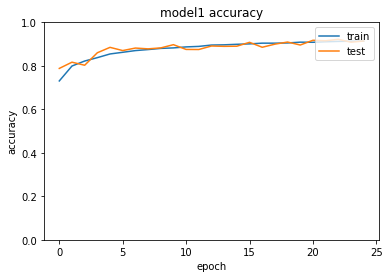

In [31]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model1 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0,1])
plt.legend(['train', 'test'], loc ='upper right')
plt.savefig('./image/model1_accuracy.png')
plt.show()

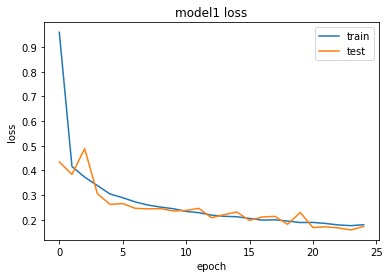

In [32]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model1 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc ='upper right')
plt.savefig('./image/model1_loss.png')
plt.show()

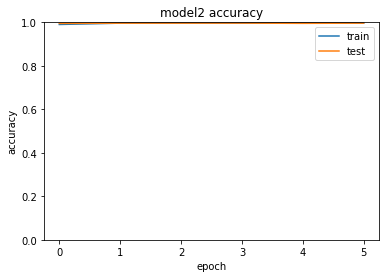

In [33]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model2 accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0,1])
plt.legend(['train', 'test'], loc ='upper right')
plt.savefig('./image/model2_accuracy.png')
plt.show()

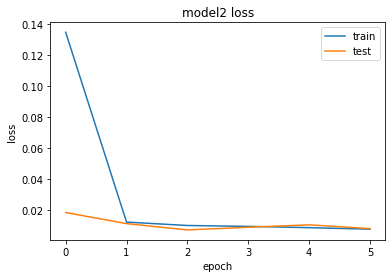

In [34]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model2 loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc ='upper right')
plt.savefig('./model2_loss.png')
plt.show()

------

In [ ]:
prediction1 = model1.predict(x1_test)
pred_result1 = tf.argmax(prediction1,axis=1)
pred_result1 = pred_result1.numpy()
display(pred_result1)

array([0, 1, 2, ..., 2, 1, 2])

In [ ]:
print(len(pred_result1[pred_result1==0]))
print(len(pred_result1[pred_result1==1]))
print(len(pred_result1[pred_result1==2]))
#print(np.count_nonzero(pred_result1))

122
3960
1918


In [ ]:
prediction2 = model2.predict(x2_test)
pred_result2 = tf.argmax(prediction2,axis=1)
pred_result2 = pred_result2.numpy()
display(pred_result2)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(len(pred_result2[pred_result2==0]))
print(np.count_nonzero(pred_result2))

18207
163
